# Reduced order model for a lithium ion cell with uniform reaction rate approximation

## Introduction
This model considers a Li-ion cell connected to an external load in a circuit. We consider that that a 3-dimensional cylindrical cell can be opened up as a sheet of paper of negligible thickness, now also assume that no change in any physical quantity occurs along the width. This turn our 3D system to a 1D one. 

Now according to standard conventions let's assume that our cell consists of **3 regions**, the **-ve electrode**, **the separator** and the **+ve electrode**. Also assume that the cell has collectors at end of either electrode. We'll be having the standard reactions in the +ve and -ve electrodes as below:

*-ve electrode:*

<div align=center>LiC₆ → x.Li⁺ + Li₁₋ₓC₆ + x.e⁻</div>

*+ve electrode:*

<div align=center>x.Li⁺ + LiMO₂ + x.e⁻ → Li₁₊ₓMO₂</div>

With this our system should look like below.

<div align=center><img src="../assets/senthil/li_cell.png"></div>

Assume that we have `x = 0` at the -ve electrode and `x = L` at the +ve electrode, L being the cell length. Length of the regions from left to right being lₙ, lₛ and lₚ respectively.

## Importing necessary libraries
To get started import the CaseStudy's senthil model (as sm for convinence) as that's the model which we're simulating. Also import Gadfly as that's the plotting library we're gonna use. To see the model constants [check here.](../src/senthil/constants/constants.jl)

In [1]:
import LiionBatteryModels.SenthilModel as sm
using Gadfly

set_default_plot_size(800px, 600px)

## Cell Voltage for different cases
In this example we'll be showing the cases of *constant current* and *discrete time-series current*. The first describes all the internal model variables also while the latter just shows you how to calculate the voltage through the necessary steps.

Essentially you can need to get values of 4 variables q₂ᵢₖ, c₂ᵢₖ, c₁ₖ and c₁ₖᵣ to calculate any cell variable (including the cell voltage) for a given current and time interval.

### Constant current case
In this case we'll be taking a current of 1C or 13.5mA over a time range of 3400s with intervals of 1s.

In [2]:
I = 13.5
t = Float64.(0:1:3400)
tspan = 1

1

#### Calculation of Interfacial Flux (q₂ᵢₖ)
The interfacial concentrations q₂ᵢₙ and q₂ᵢₚ (in -ve and +ve electodes respectively) are calculated by solving the ODE obtained after profile approximations with initial values of 0, 0. The results are also plotted.

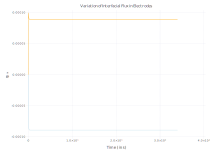

In [3]:

q₂ᵢₖ = sm.InterfacialFlux(t, tspan, I)


plot(
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=q₂ᵢₖ.q₂ᵢₚ, Geom.line, color=[colorant"lightblue"]),
    Guide.title("Variation of Interfacial Flux in Electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("q₂ᵢₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Interfacial flux in -ve electode: q₂ᵢₙ", 
    #         "Interfacial flux in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "lightblue"]
    # )
)

#### Calculation of Interfacial Concentration (c₂ᵢₖ)
Having calculated q₂ᵢₖ, we can calulate c₂ᵢₙ and c₂ᵢₚ via a set of linear algeabric equations. The results are plotted.

In [4]:
c₂ᵢₖ = sm.InterfacialConc(q₂ᵢₖ)


plot(
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₂ᵢₖ.c₂ᵢₚ, Geom.line, color=[colorant"lightblue"]),
    Guide.title("Variation of interfacial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₂ᵢₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Interfacial concentration in -ve electode: q₂ᵢₙ", 
    #         "Interfacial concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # )
)

#### Calculation of various electrolyte concentration profiles
Having obtained q₂ᵢₖ and c₂ᵢₖ, we can plot the internal parameters like c₂₀ₜ, c₂ₘₜ and c₂ₗₜ, which are electrolyte concentrations at x = 0, lₙ + lₛ/2 and L respectively.

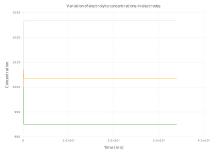

In [5]:
c₂₀ₜ = sm.c₂₀ₜ(c₂ᵢₖ, q₂ᵢₖ)
c₂ₘₜ = sm.c₂ₘₜ(c₂ᵢₖ, q₂ᵢₖ)
c₂ₗₜ = sm.c₂ₗₜ(c₂ᵢₖ, q₂ᵢₖ)

plot(
    layer(x=t, y=c₂₀ₜ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₂ₘₜ, Geom.line,color=[colorant"green"]),
    layer(x=t, y=c₂ₗₜ, Geom.line,color=[colorant"lightblue"]),
    Guide.title("Variation of electrolyte concentrations in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("Concentration"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Solid concentration in -ve electode: q₂ᵢₙ", 
    #         "Solid concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "lightblue"],
    # )
)

#### Calculation of Solid Concentration (c₁ₖ)

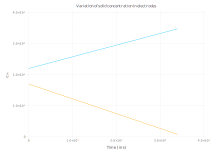

In [6]:
c₁ₖ = sm.SolidConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖ.c₁ₙ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖ.c₁ₚ, Geom.line),
    Guide.title("Variation of solid concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Solid concentration in -ve electode: q₂ᵢₙ", 
    #         "Solid concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # )
)

#### Calculation of Solid Radial Concentration (c₁ₖᵣ)

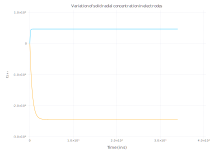

In [7]:
c₁ₖᵣ = sm.SolidRadialConcentration(t, tspan, I)

plot(
    layer(x=t, y=c₁ₖᵣ.c₁ₙᵣ, Geom.line, color=[colorant"orange"]),
    layer(x=t, y=c₁ₖᵣ.c₁ₚᵣ, Geom.line),
    Guide.title("Variation of solid radial concentration in electrodes"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("c₁ₖᵣ"),
    # Guide.manual_color_key(
    #     "Legend", 
    #     [
    #         "Solid radial concentration in -ve electode: q₂ᵢₙ", 
    #         "solid radial concentration in +ve electode: q₂ᵢₚ"
    #     ], 
    #     ["orange", "blue"]
    # size=Measure[]
    # )
)

#### Calculation of Cell Voltage (V)

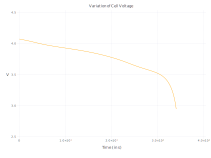

In [8]:
V = sm.V(I, c₁ₖ, c₁ₖᵣ, c₂ᵢₖ, q₂ᵢₖ)

plot(
    layer(x=t, y=V, Geom.line, color=[colorant"orange"]),
    Guide.title("Variation of Cell Voltage"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("V"),
)

### Discrete time series current case
In this we will be taking a discrete time series current over a period of 100 seconds with a interval of 10s.

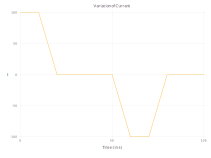

In [9]:
I_dst = Float64.([100, 100, 0, 0, 0, 0, -100, -100, 0, 0, 0])
t_dst = Float64.(0 : 10: 100)
tspan_dst = 10

plot(
    layer(x=t_dst, y=I_dst, Geom.line, color=[colorant"orange"]),
    Guide.title("Variation of Current"),
    Guide.xlabel("Time (in s)"),
    Guide.ylabel("I"),
)

In [10]:
q₂ᵢₖ_dst = sm.InterfacialFlux(t_dst, tspan_dst, I_dst)

CaseStudy.SenthilModel.InterfacialFlux([0.0, -1.2927437769444219, -1909.0534552944737, -2.8173470664291554e6, -4.157788811367259e9, -6.135988001283453e12, -9.055377860691884e15, -1.336375954170004e19, -1.9721989721004697e22, -2.910534848683267e25, -4.295313619587559e28], [0.0, 0.6294987442498661, 929.6824915461153, 1.3720089878077689e6, 2.0247855463417869e9, 2.98814114453321e12, 4.409843558880609e15, 6.507965746323086e18, 9.604335752460481e21, 1.4173901468075005e25, 2.091758222584331e28])

In [11]:
c₂ᵢₖ_dst = sm.InterfacialConc(q₂ᵢₖ_dst)

CaseStudy.SenthilModel.InterfacialConc([1000.0, 94863.28368237984, 1.386215913935573e8, 2.045738148976902e11, 3.019062595169163e14, 4.455476865100726e17, 6.57531053753997e20, 9.703721952578659e23, 1.4320573788167576e27, 2.1134038529190835e30, 3.1189224060446985e33], [1000.0, 143978.96463296254, 2.111475349235131e8, 3.116062997802248e11, 4.5986282559313625e14, 6.786570718443483e17, 1.0015495829026788e21, 1.4780683921652187e24, 2.181306057345901e27, 3.2191312262917666e30, 4.750734458921209e33])

In [12]:
c₁ₖ_dst = sm.SolidConcentration(t_dst, tspan_dst, I_dst)

CaseStudy.SenthilModel.SolidConcentration([17000.0, 16996.469395162923, 16992.938790325847, 16989.40818548877, 16985.877580651693, 16982.346975814617, 16978.81637097754, 16975.285766140463, 16971.755161303387, 16968.22455646631, 16964.693951629233], [22000.0, 22002.780641521786, 22005.56128304357, 22008.341924565357, 22011.122566087142, 22013.903207608928, 22016.683849130713, 22019.4644906525, 22022.245132174285, 22025.02577369607, 22027.806415217856])

In [13]:
c₁ₖᵣ_dst = sm.SolidRadialConcentration(t_dst, tspan_dst, I_dst)

CaseStudy.SenthilModel.SolidRadialConcentration([0.0, -3.024986638654009e6, -5.544576555123618e6, -7.643208418833294e6, -9.391213390034596e6, -1.0847172118281163e7, -1.205987794765906e7, -1.3069972121398631e7, -1.3911305786254536e7, -1.461207444131894e7, -1.5195762849894485e7], [0.0, 2.3691065765597993e6, 3.12343011053644e6, 3.3636067237546025e6, 3.4400789574032654e6, 3.4644277165969997e6, 3.4721803615242844e6, 3.474648803669132e6, 3.4754347556480514e6, 3.4756850027581393e6, 3.475764681437991e6])

In [14]:
V = sm.V(I, c₁ₖ, c₁ₖᵣ, c₂ᵢₖ, q₂ᵢₖ)

3401-element Vector{Float64}:
 4.073847254934561
 4.073918826989838
 4.073837249531134
 4.073704154122676
 4.073550493017847
 4.073387346705884
 4.073219635126736
 4.073050032202875
 4.072880182849374
 4.072711146372856
 ⋮
 2.991013611470557
 2.985953232992597
 2.980809972387922
 2.975581389896118
 2.970264953683965
 2.96485803600758
 2.9593579091959397
 2.9537617414450335
 2.9480665924116187